# Online Retail Sales Exploratory Data Analysis

<div>
<img src="images/Analyst.jpeg" width="500"/>
</div>

## Understand Basic Dataset Contents
**[Data Quality Issues/Concerns](#data_quality_issues_concerns)**

**Items**
- What Items are Ordered the Most/Least?
- What Items bring in the most/least Revenue?

**Cancelled Orders**
- Fully Cancelled Order Analysis
- Partially Cancelled Order Analysis

**Customers**
- What Customers Order the Most/Least?
- What Customers Spend the Most (total and per order)?

**Countries**
- What Countries Order the Most/Least?
- What Countries Spend the Most (total and per order)?

**Regions/Sub-Regions**
- What Regions/Sub-Regions Order the Most/Least?
- What Regions/Sub-Regions Spend the Most (total and per order)?

**Invoice Dates**
- Day/Hour Analysis
- Timeseries Analysis

### Setup Libraries and Load in Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
country_mapping_df = pd.read_csv("data/Country Mapping.csv")
region_mapping_df = pd.read_csv("data/region_mapping.csv")
retail_sales_df = pd.read_csv("data/daily_history/orders_2011-02-20.csv")
retail_sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
95913,544467,22784,LANTERN CREAM GAZEBO,1,2011-02-20,4.95,14502.0,United Kingdom,2011-02-20
95914,544467,22427,ENAMEL FLOWER JUG CREAM,1,2011-02-20,5.95,14502.0,United Kingdom,2011-02-20
95915,544467,22799,SWEETHEART WIRE FRUIT BOWL,1,2011-02-20,8.50,14502.0,United Kingdom,2011-02-20
95916,544467,22776,SWEETHEART CAKESTAND 3 TIER,1,2011-02-20,9.95,14502.0,United Kingdom,2011-02-20


### Create New Features and Create Aggregate Tables

In [5]:
# Add new features
retail_sales_df["Cost"] = retail_sales_df["UnitPrice"]*retail_sales_df["Quantity"]
retail_sales_df['alpha-3'] = pd.merge(retail_sales_df,country_mapping_df,how='left',left_on='Country',right_on='country_name').drop(['country_name'],axis=1)['alpha-3']

# Create Aggregate Tables
customer_invoice_totals = retail_sales_df.groupby(["CustomerID","InvoiceNo"])["Cost"].sum().reset_index()

### Data Quality Issues/Concerns
<a id='data_quality_issues_concerns'></a>

**Missing Dates**

There are order dates with 0 orders. Examples are `2010-12-04`,`2010-12-11`,`2010-12-18`,`2010-12-24` - `2011-01-03` etc

In [6]:
retail_sales_df.InvoiceDate.unique()

array(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-05',
       '2010-12-06', '2010-12-07', '2010-12-08', '2010-12-09',
       '2010-12-10', '2010-12-12', '2010-12-13', '2010-12-14',
       '2010-12-15', '2010-12-16', '2010-12-17', '2010-12-19',
       '2010-12-20', '2010-12-21', '2010-12-22', '2010-12-23',
       '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
       '2011-01-09', '2011-01-10', '2011-01-11', '2011-01-12',
       '2011-01-13', '2011-01-14', '2011-01-16', '2011-01-17',
       '2011-01-18', '2011-01-19', '2011-01-20', '2011-01-21',
       '2011-01-23', '2011-01-24', '2011-01-25', '2011-01-26',
       '2011-01-27', '2011-01-28', '2011-01-30', '2011-01-31',
       '2011-02-01', '2011-02-02', '2011-02-03', '2011-02-04',
       '2011-02-06', '2011-02-07', '2011-02-08', '2011-02-09',
       '2011-02-10', '2011-02-11', '2011-02-13', '2011-02-14',
       '2011-02-15', '2011-02-16', '2011-02-17', '2011-02-18',
       '2011-02-20'], dtype=object)

**InvoiceNo with Negative Cost**

It looks like there are orders that fully or partially cancel out a previous order. Examples of this are InvoiceNo `541431` which is cancelled out by `C541433` so when running our analysis or building our models we should remove these orders from the analysis. 

When building models this may be something we want to predict liklihood an order is cancelled based on the order information.

In [7]:
retail_sales_df.sort_values("Cost",ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateTime,Cost,alpha-3
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,2011-01-18,77183.60,GBR
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07,13541.33,NaN,United Kingdom,2010-12-07,13541.33,GBR
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11,2.10,15749.0,United Kingdom,2011-01-11,6539.40,GBR
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11,2.55,15749.0,United Kingdom,2011-01-11,4921.50,GBR
52772,540818,48185,DOORMAT FAIRY CAKE,670,2011-01-11,6.75,15749.0,United Kingdom,2011-01-11,4522.50,GBR
...,...,...,...,...,...,...,...,...,...,...,...
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07,13541.33,NaN,United Kingdom,2010-12-07,-13541.33,GBR
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07,13541.33,NaN,United Kingdom,2010-12-07,-13541.33,GBR
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05,16453.71,NaN,United Kingdom,2011-01-05,-16453.71,GBR
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05,16888.02,NaN,United Kingdom,2011-01-05,-16888.02,GBR


**Missing Customer IDs**

There are around 33,500 (~35%) records without a CustomerID which will affect any analysis done at the Customer level

In [8]:
retail_sales_df[retail_sales_df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateTime,Cost,alpha-3
622,536414,22139,NaN,56,2010-12-01,0.00,NaN,United Kingdom,2010-12-01,0.00,GBR
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01,2.51,NaN,United Kingdom,2010-12-01,2.51,GBR
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01,2.51,NaN,United Kingdom,2010-12-01,5.02,GBR
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01,0.85,NaN,United Kingdom,2010-12-01,3.40,GBR
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01,1.66,NaN,United Kingdom,2010-12-01,3.32,GBR
...,...,...,...,...,...,...,...,...,...,...,...
95043,544434,22966,GINGERBREAD MAN COOKIE CUTTER,3,2011-02-18,1.25,NaN,United Kingdom,2011-02-18,3.75,GBR
95044,544434,20676,RED RETROSPOT BOWL,6,2011-02-18,1.25,NaN,United Kingdom,2011-02-18,7.50,GBR
95045,544434,22963,JAM JAR WITH GREEN LID,3,2011-02-18,0.85,NaN,United Kingdom,2011-02-18,2.55,GBR
95046,544434,22849,BREAD BIN DINER STYLE MINT,1,2011-02-18,16.95,NaN,United Kingdom,2011-02-18,16.95,GBR


**Fee's and Adjustments in an Invoice**

There are some transactions that have an associated Stock code for a Fee or an adjustment made to the invoice

In [9]:
retail_sales_df.Description.value_counts().reset_index().Description.to_list()

['WHITE HANGING HEART T-LIGHT HOLDER',
 'REGENCY CAKESTAND 3 TIER',
 'HEART OF WICKER SMALL',
 'JUMBO BAG RED RETROSPOT',
 'SET OF 3 CAKE TINS PANTRY DESIGN ',
 'JAM MAKING SET PRINTED',
 'HEART OF WICKER LARGE',
 'NATURAL SLATE HEART CHALKBOARD ',
 'JAM MAKING SET WITH JARS',
 'LUNCH BAG RED RETROSPOT',
 'SMALL POPCORN HOLDER',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'SCOTTIE DOG HOT WATER BOTTLE',
 'PLEASE ONE PERSON METAL SIGN',
 'HAND WARMER BABUSHKA DESIGN',
 'RECIPE BOX PANTRY YELLOW DESIGN',
 'SET OF 3 HEART COOKIE CUTTERS',
 'RED HANGING HEART T-LIGHT HOLDER',
 'RETROSPOT HEART HOT WATER BOTTLE',
 'WOODEN FRAME ANTIQUE WHITE ',
 'SET OF 6 SPICE TINS PANTRY DESIGN',
 'HOME BUILDING BLOCK WORD',
 'CHOCOLATE HOT WATER BOTTLE',
 'ALARM CLOCK BAKELIKE RED ',
 'ALARM CLOCK BAKELIKE GREEN',
 'SET/20 RED RETROSPOT PAPER NAPKINS ',
 'REX CASH+CARRY JUMBO SHOPPER',
 'GREY HEART HOT WATER BOTTLE',
 'POSTAGE',
 'JUMBO STORAGE BAG SUKI',
 'STRAWBERRY CERAMIC T

In [10]:
retail_sales_df[(retail_sales_df.Description.fillna("").str.lower().str.contains("postage| fee|adjust|manual"))&(~retail_sales_df.Description.fillna("").str.lower().str.contains("feed"))].Description.unique()

array(['POSTAGE', 'DOTCOM POSTAGE', 'Manual', 'AMAZON FEE',
       'reverse 21/5/10 adjustment'], dtype=object)

### Using LLM for Grouping Text in Description Section

In [11]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

In [12]:
unique_descriptions = retail_sales_df.Description.value_counts().reset_index().Description.to_list()
description_embeddings = model.encode(unique_descriptions, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

Batches: 100%|██████████| 48/48 [00:05<00:00,  8.39it/s]


### Items

### Cancelled Orders

### Customers

In [13]:
customer_invoice_totals.sort_values("Cost")

,CustomerID,InvoiceNo,Cost
1,12346.0,C541433,-77183.60
134,12539.0,C542348,-1715.85
894,13680.0,C540417,-1520.11
2398,16013.0,C539329,-1491.00
1179,14146.0,C542426,-1241.43
...,...,...,...
43,12415.0,543989,14022.92
2245,15749.0,540815,15160.90
3690,18102.0,537659,15885.49
1182,14156.0,541220,16774.72


In [14]:
# Each Customer could have multiple Invoices
retail_sales_df.groupby("CustomerID")["InvoiceNo"].unique().str.len().sort_values()

CustomerID
14150.0     1
14589.0     1
14594.0     1
14595.0     1
14600.0     1
           ..
14911.0    28
15311.0    32
17850.0    35
14606.0    36
12748.0    42
Name: InvoiceNo, Length: 1620, dtype: int64

In [15]:
# Each Customer could have multiple countries
retail_sales_df.groupby("CustomerID")["Country"].unique().str.len().sort_values()

CustomerID
12346.0    1
16378.0    1
16367.0    1
16365.0    1
16359.0    1
          ..
14292.0    1
14320.0    1
18283.0    1
12370.0    2
12431.0    2
Name: Country, Length: 1620, dtype: int64

### Countries

In [17]:
# Countries are mostly in Europe with a few in North America, Asia, Africa and the Middle East


In [18]:
# Add Country to region mapping

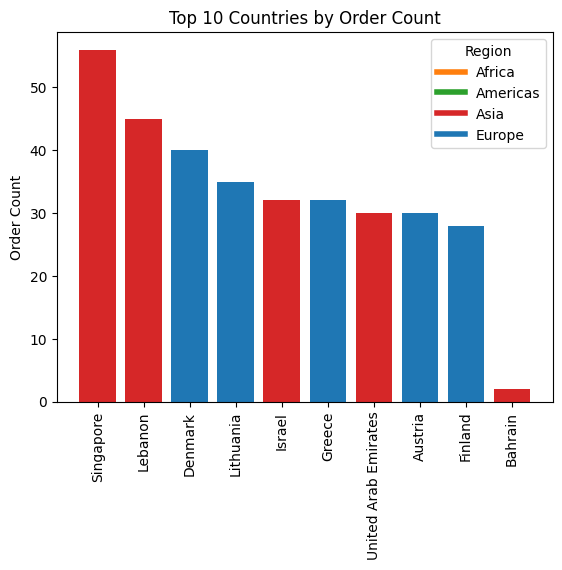

In [19]:
def rotate_text(text):
    return"\n".join([x.upper() for x in text])
def rotate_list(text_list):
    return [rotate_text(x) for x in text_list]
def region_to_color(region):
    if region=="Europe":
        return "tab:blue"
    elif region=="Asia":
        return "tab:red"
    elif region=="Africa":
        return "tab:orange"
    elif region=="Americas":
        return "tab:green"
    else:
        return "tab:grey"
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="tab:orange", lw=4),
                Line2D([0], [0], color="tab:green", lw=4),
                Line2D([0], [0], color="tab:red", lw=4),
                Line2D([0], [0], color="tab:blue", lw=4)]
region_list = ["Africa","Americas","Asia","Europe"]


country_level_invoice_counts = retail_sales_df.groupby("alpha-3")["InvoiceNo"].count().reset_index().rename(columns={"InvoiceNo":"Count"})
country_level_invoice_counts = pd.merge(country_level_invoice_counts,region_mapping_df,how='left',on='alpha-3')[['name','region','sub-region','Count']]
top10_countries_by_invoice_counts = country_level_invoice_counts.sort_values("Count").head(10).sort_values("Count",ascending=False).reset_index(drop=True)

fig, ax = plt.subplots()
ax.bar(top10_countries_by_invoice_counts["name"], top10_countries_by_invoice_counts["Count"],color=top10_countries_by_invoice_counts['region'].map(region_to_color))#, label=bar_labels, color=bar_colors)

ax.set_ylabel('Order Count')
ax.set_title('Top 10 Countries by Order Count')
ax.legend(custom_lines, region_list,title="Region")
plt.xticks(rotation = 90)
plt.show()

In [20]:
# Each invoice has a single country
retail_sales_df.groupby("InvoiceNo")["Country"].unique().str.len().sort_values()

InvoiceNo
536365     1
542911     1
542914     1
542915     1
542919     1
          ..
539450     1
539449     1
539447     1
539454     1
C544458    1
Name: Country, Length: 4490, dtype: int64

### Regions / Sub Regions

### Invoice Dates